<a href="https://colab.research.google.com/github/luan1199/colab_projects/blob/master/PE_DATA_ANALYSIS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from xgboost import plot_importance
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/pe_data/CONDEPEFIDEM_NumeroEmpregadosMercadoFormal2010_dado.csv',sep=';')
new_data = pd.DataFrame(data)

new_data.head()


,Município,Agropecuária,Extrativa mineral,Indústria de transformação,Construção civil,Serviços industriais de utilidade pública,Comércio,Serviços,Administração pública
0,Abreu e Lima,26,-,3139,256,29,2033,29,1587
1,Afogados da Ingazeira,13,-,435,13,44,774,44,842
2,Afrânio,15,-,102,16,3,133,3,680
3,Agrestina,143,-,62,16,-,139,-,827
4,Água Preta,330,-,73,4,31,91,31,1206


In [0]:
new_data.drop('Extrativa mineral',axis=1)


,Município,Agropecuária,Indústria de transformação,Construção civil,Serviços industriais de utilidade pública,Comércio,Serviços,Administração pública
0,Abreu e Lima,26,3139,256,29,2033,29,1587
1,Afogados da Ingazeira,13,435,13,44,774,44,842
2,Afrânio,15,102,16,3,133,3,680
3,Agrestina,143,62,16,-,139,-,827
4,Água Preta,330,73,4,31,91,31,1206
...,...,...,...,...,...,...,...,...
180,Vertente do Lério,1,170,-,-,8,-,536
181,Vertentes,55,91,-,-,131,-,460
182,Vicência,432,3215,52,-,187,-,1539
183,Vitória de Santo Antão,418,7024,238,16,3662,16,2996


In [0]:
import matplotlib.pyplot as plt

def plot_inf(x_label='',y_label='Comércio'):
  fig, ax = plt.subplots(figsize=(18,6))
  ax.scatter(new_data[x_label], new_data[y_label])
  # set a title and labels
  ax.set_title('Data')
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)

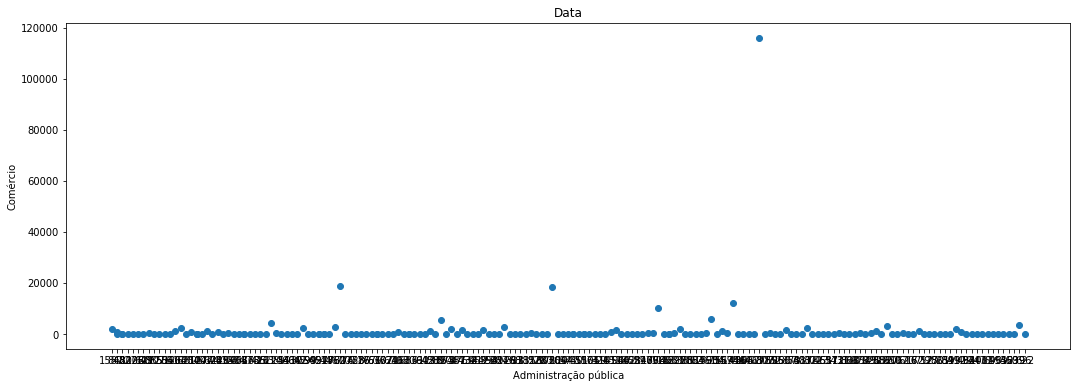

In [0]:
plot_inf(x_label=new_data.columns[8])



In [0]:
divisor = int(new_data.shape[0]*0.75)
x_train = new_data[:divisor]

y_train = new_data[:divisor]

x_test = new_data[divisor:]
#x_test.drop(['Comércio', 'Município'],axis=1)

y_test = new_data[divisor:]

for x in ['Município', 'Agropecuária', 'Extrativa mineral',
       'Indústria de transformação', 'Construção civil',
       'Serviços industriais de utilidade pública', 'Serviços',
       'Administração pública']:
  del y_train[x]
  del y_test[x]

for x in ['Comércio','Município']:
  del x_train[x]
  del x_test[x]
  

print(x_train.shape,y_train.shape,'\n',x_test.shape,y_test.shape)

(138, 7) (138, 1) 
 (47, 7) (47, 1)


In [0]:
for x in x_train.columns:
  x_train[x] = x_train[x].replace('-',0)
  x_test[x] = x_test[x].replace('-',0)

for x in y_train.columns:
  y_train[x] = y_train[x].replace('-',0)
  y_test[x] = y_test[x].replace('-',0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [0]:
x_test

,Agropecuária,Extrativa mineral,Indústria de transformação,Construção civil,Serviços industriais de utilidade pública,Serviços,Administração pública
138,0,0,24,0,0,0,853
139,8,0,71,43,19,19,761
140,0,0,10,3,0,0,566
141,2,0,9,0,0,0,400
142,32,3,4386,184,6,6,1876
143,0,0,0,0,0,0,302
144,182,9,84,3,3,3,1213
145,1,3,30,0,0,0,463
146,0,0,3,0,0,0,557
147,130,0,18,0,0,0,543


In [0]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=10,criterion='mse',max_depth=500)

regressor.fit(x_train,y_train)

regressor.score(x_test,y_test)

0.5834767749571966

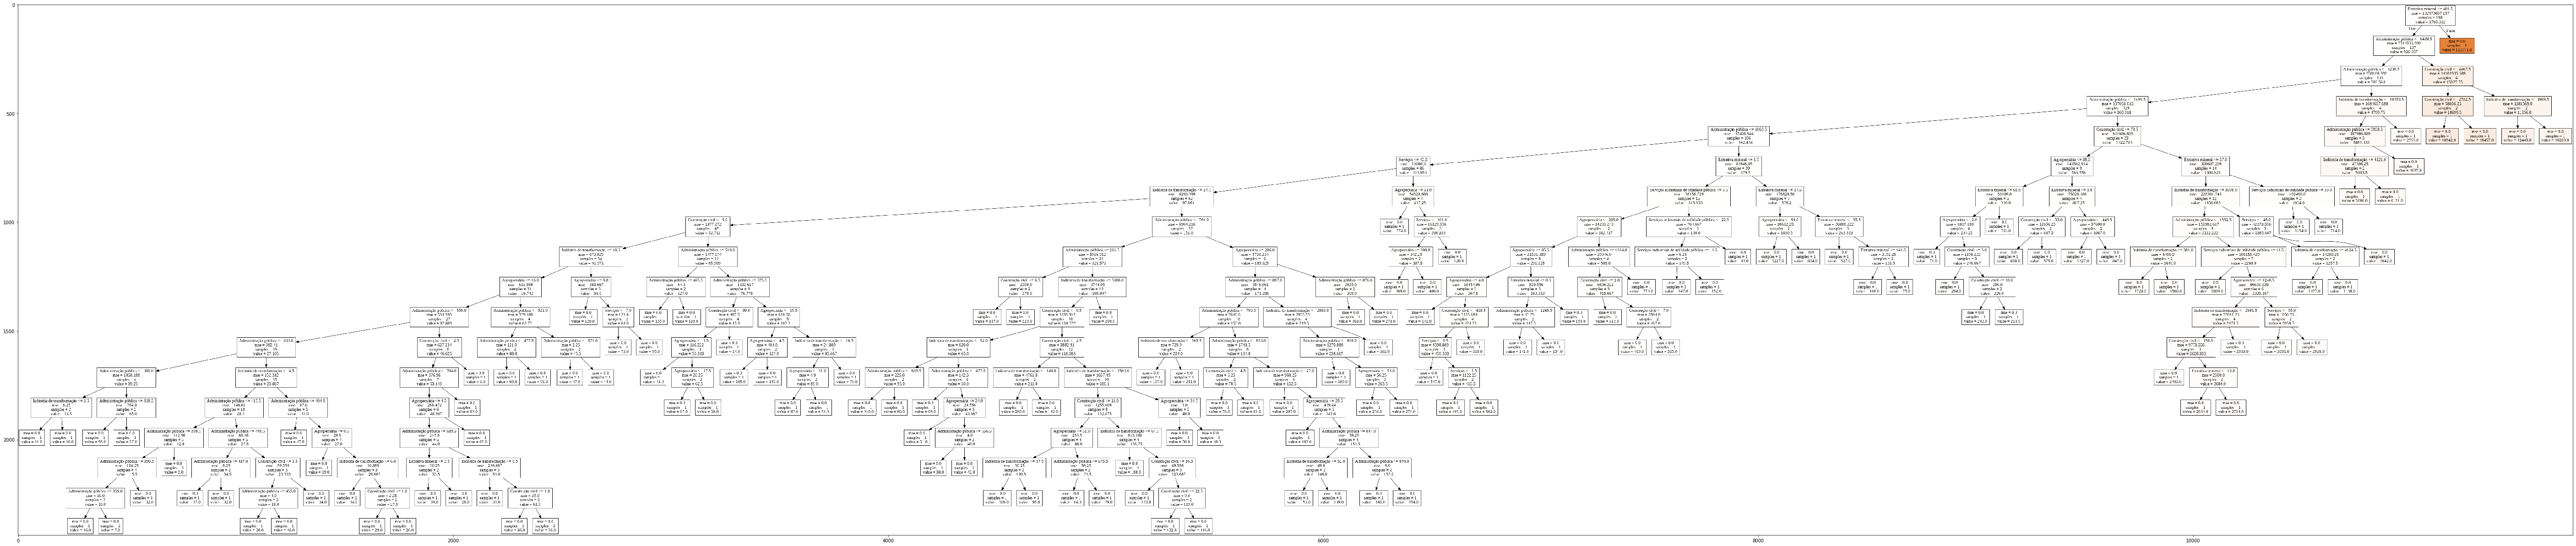

In [0]:
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =x_train.columns,filled=True)

!dot -Tpng tree.dot -o tree.png

#plotando a imagem

img = plt.imread('tree.png')

plt.figure(figsize=(100,100))

plt.imshow(img)

In [0]:
#feature importance com rf (melhor que decisiontree)

feature_importance = pd.DataFrame()

rf = RandomForestRegressor(n_estimators=10,
                          max_depth=5,
                          n_jobs=-1)

rf.fit(x_train, y_train)

feature_importance['variável'] = x_test.columns

feature_importance['importância'] = rf.feature_importances_
fi = feature_importance.sort_values(by='importância',
                                ascending=False)
'''
for i in range(30):

  export_graphviz(rf.estimators_[i], out_file ='tree.dot', 
                feature_names =x_train.columns,filled=True)

  !dot -Tpng tree.dot -o tree+i+.png
'''


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


"\nfor i in range(30):\n\n  export_graphviz(rf.estimators_[i], out_file ='tree.dot', \n                feature_names =x_train.columns,filled=True)\n\n  !dot -Tpng tree.dot -o tree+i+.png\n"

In [0]:
print('\nTAXA DE IMPORTÂNCIA DA INFLUÊNCIA NO FATOR:"NÚMERO DE EMPREGADOS" DE DIVERSOS SETORES EM RELAÇÃO AO COMÉRCIO NO ESTADO DE PERNAMBUCO(2013)\n')
print('Dados obtidos a partir de predições através de Inteligência Artificial(Random Forest Regressor)\n')
print("TAXA DE PRECISÃO DA TECNOLOGIA:{0:.2f}%\n".format(rf.score(x_test,y_test)*100))
pd.DataFrame(fi)



TAXA DE IMPORTÂNCIA DA INFLUÊNCIA NO FATOR:"NÚMERO DE EMPREGADOS" DE DIVERSOS SETORES EM RELAÇÃO AO COMÉRCIO NO ESTADO DE PERNAMBUCO(2013)

Dados obtidos a partir de predições através de Inteligência Artificial(Random Forest Regressor)

TAXA DE PRECISÃO DA TECNOLOGIA:71.21%



,variável,importância
6,Administração pública,0.572695
1,Extrativa mineral,0.186483
2,Indústria de transformação,0.101810
5,Serviços,0.093351
3,Construção civil,0.035853
4,Serviços industriais de utilidade pública,0.009362
0,Agropecuária,0.000446


Feature ranking:
1. feature 6 (0.572695)
2. feature 1 (0.186483)
3. feature 2 (0.101810)
4. feature 5 (0.093351)
5. feature 3 (0.035853)
6. feature 4 (0.009362)
7. feature 0 (0.000446)


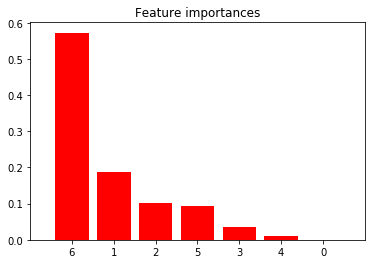

In [0]:
importances = rf.feature_importances_
std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(rf.feature_importances_)[::-1]


print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f],
                                   rf.feature_importances_[indices[f]]))


plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), rf.feature_importances_[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [0]:
rf.predict(x_train.head(1))

array([1588.3147896])

In [0]:
y_pred = regressor.predict(x_test)

# XAI SESSION

In [0]:
importance['importancia'] = importance['importancia'] *100



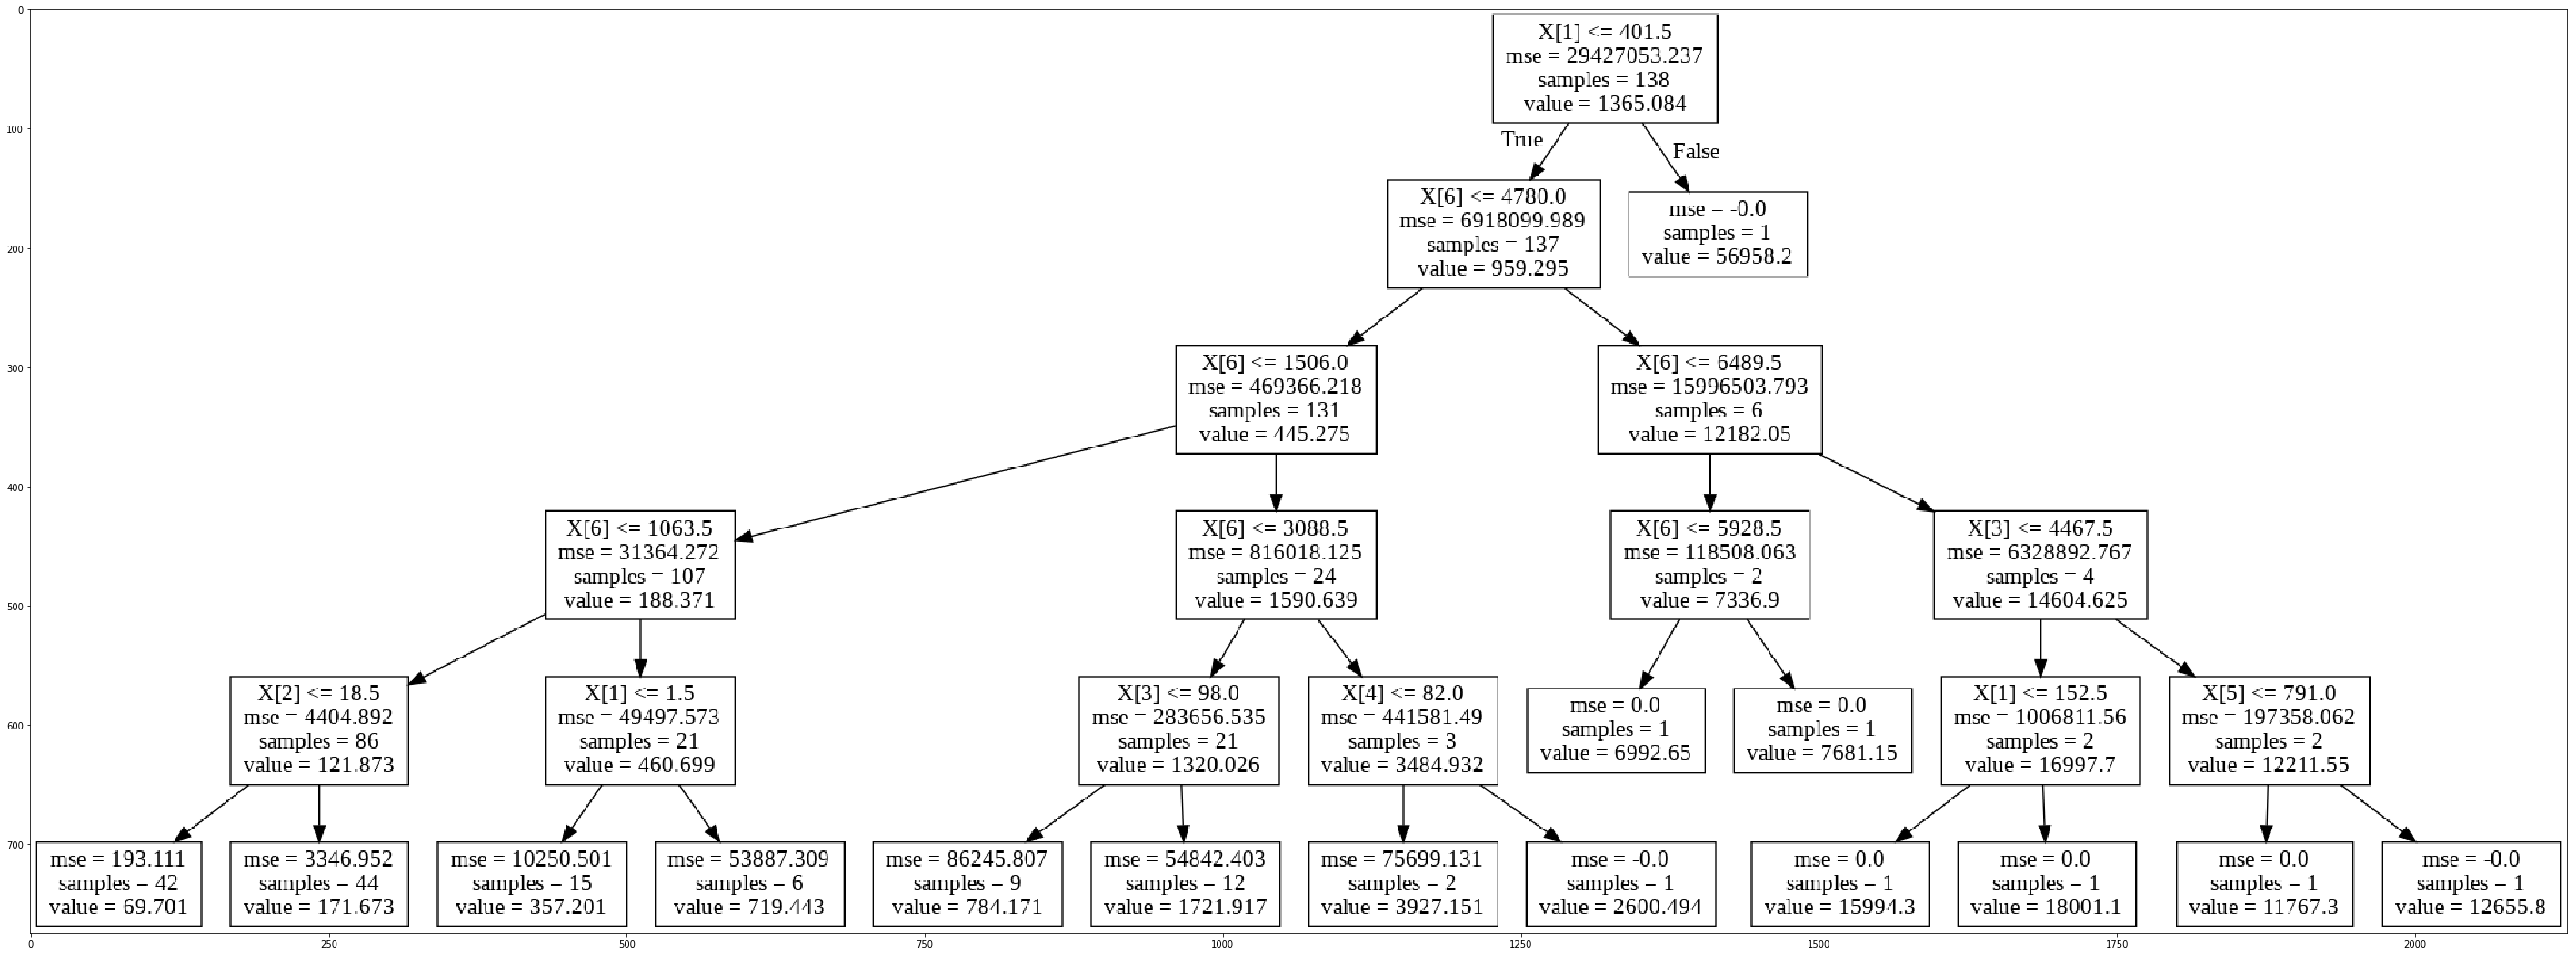

In [0]:
#GLOBAL SUGORRATE

new_target = rf.predict(x_train)

dt_model = DecisionTreeRegressor(max_depth=5, random_state=10)

dt_model.fit(x_train, new_target)

decision_tree = tree.export_graphviz(dt_model, out_file='tree_xai.dot')

!dot -Tpng tree_xai.dot -o tree_xai.png

plt.figure(figsize=(50,30))

plt.imshow(plt.imread('tree_xai.png'))

In [0]:
y_pred = rf.predict(x_test)
import sklearn



In [0]:
y_pred = np.array(y_pred)
#y_train = np.array(y_train).reshape(138)
y_pred = y_pred.reshape(47,1)
y_test = np.array(y_test)
#ROOT MEAN SQUARED ERROR
cont_pred = 0;
cont_true = 0;

def rmsd(y_pred,y_test):
  sum_ = 0
  for i in range(len(y_pred[:])):
    sum_ += (y_pred[i] - y_test[i])**2
  rmse = (sum_/47)**(1/2)
  return rmse[0]

In [0]:
def nrmsd(rmsd=None,y_pred=y_pred,y_test=y_test):
  nrmsd = rmsd/(y_test.max() - y_test.min())
  return nrmsd
i = rmsd(y_pred,y_test)
print('RAIZ DO ERRO QUADRÁDICO MÉDIO NORMALIZADA:{0}'.format(nrmsd(i)))

RAIZ DO ERRO QUADRÁDICO MÉDIO NORMALIZADA:0.12322450242174428


In [0]:
i

450.8784543611623

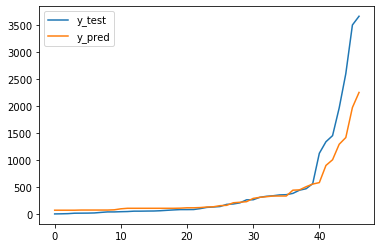

In [0]:
plt.plot(list(range(47)),
         np.sort(y_test,axis=0),
         np.sort(y_pred,axis=0),gr)

plt.legend(['y_test', 'y_pred'])

In [0]:
r = np.array([1,2,3,4,5])
n =r/(r.max() - r.min())
r

array([1, 2, 3, 4, 5])

In [0]:
y

array([0.25, 0.5 , 0.75, 1.  , 1.25])